# EQUITY DIGITAL OPTION CASH-OR-NOTHING OPTION

Valuation and Risk of Equity Digital Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.33 - This build:  11 Nov 2023 at 08:55 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# Cash-or-Nothing Digital Option

I define a digital call and a digital put option.

In [3]:
underlying_type = FinDigitalOptionTypes.CASH_OR_NOTHING

In [4]:
expiry_date = Date(1, 10, 2008)

In [5]:
strike_price = 90.0

In [6]:
digitalCall = EquityDigitalOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL, underlying_type)

In [7]:
digitalPut = EquityDigitalOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT, underlying_type)

In [8]:
print(digitalCall)

OBJECT TYPE: EquityDigitalOption
EXPIRY DATE: 01-OCT-2008
BARRIER LEVEL: 90.0
CALL-PUT TYPE: OptionTypes.EUROPEAN_CALL
DIGITAL TYPE: FinDigitalOptionTypes.CASH_OR_NOTHING


In [9]:
print(digitalPut)

OBJECT TYPE: EquityDigitalOption
EXPIRY DATE: 01-OCT-2008
BARRIER LEVEL: 90.0
CALL-PUT TYPE: OptionTypes.EUROPEAN_PUT
DIGITAL TYPE: FinDigitalOptionTypes.CASH_OR_NOTHING


## Valuation

In [10]:
value_date = Date(1, 1, 2008)

In [11]:
interest_rate = 0.045

In [12]:
discount_curve = DiscountCurveFlat(value_date, interest_rate)

In [13]:
volatility = 0.25

In [14]:
model = BlackScholes(volatility)

In [15]:
stock_price = 110.0
dividend_yield = 0.045

In [16]:
dividend_curve = DiscountCurveFlat(value_date, dividend_yield)

In [17]:
digitalCall.value(value_date, stock_price, discount_curve, dividend_curve, model)

0.76707743371463

In [18]:
digitalPut.value(value_date, stock_price, discount_curve, dividend_curve, model)

0.19979518107018837

## Check Monte-Carlo

In [19]:
digitalCall.value_mc(value_date, stock_price, discount_curve, dividend_curve, model)

0.7696789449994546

In [20]:
digitalPut.value_mc(value_date, stock_price, discount_curve, dividend_curve, model)

0.1971936697853637

## Vectorisations

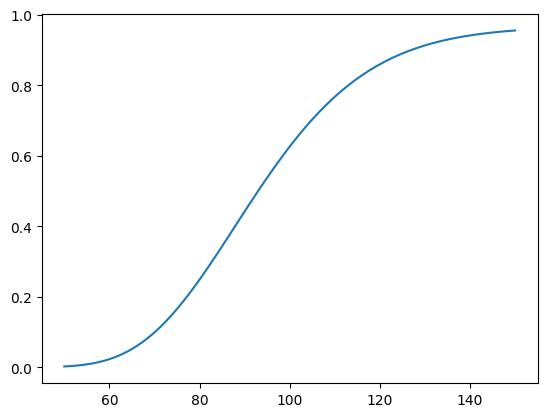

In [21]:
stock_prices = np.linspace(50,150,100)
v = digitalCall.value(value_date, stock_prices, discount_curve, dividend_curve, model)
plt.plot(stock_prices, v);

We can vectorise two things at the same time as long as they have the same length

## Risk Analysis

The analytical model produced the following sensitivities

In [22]:
digitalCall.delta(value_date, stock_price, discount_curve, dividend_curve, model)

0.011584328476477168

In [23]:
digitalCall.gamma(value_date, stock_price, discount_curve, dividend_curve, model)

-0.0005031197680693822

In [24]:
digitalCall.theta(value_date, stock_price, discount_curve, dividend_curve, model)

0.22501650587903932

In [25]:
digitalCall.vega(value_date, stock_price, discount_curve, dividend_curve, model)

-0.011210049840873149

In [26]:
digitalCall.rho(value_date, stock_price, discount_curve, dividend_curve, model)

0.37952340999347633

Copyright (c) 2020 Dominic O'Kane